# Practical 3

### [Carl Henrik Ek](http://carlhenrik.com/), University of Cambridge

### [Radzim Sendyka](https://www.cst.cam.ac.uk/people/rs2071), University of Cambridge

### [Christian Cabrera](https://www.cst.cam.ac.uk/people/chc79), University of Cambridge

### 2024-11-18

The check Session for this Practical is 21 November 2024

Prerequisite: Practical 1, Practical 2

**Abstract:**

In this worksheet we will look at linear models. We will show a general framework for formulating models where the we have a set of response variables that we want to explain through a linear relation- ship from a set of explanatory variables. While many relationships are non-linear in nature it is often challenging to interpret and explain the results from non-linear models. Therefore, linear models remains very important as they provide a nice trade-off between explanation of the data while at the same time providing interpretable semantics.


# Generalised Linear Models

We have a set of explanatory variables $x \in X$ and a set of response variables $y \in Y$. The data is provided to us in pairs $D = \{x_i, y_i\}_N$ where $x_i$ and $y_i$ are in correspondence. Our aim is to build a model that allows us to predict the response variable $y_i$ from its corresponding explanatory variable $x_i$.

Linear regression makes the assumption that the relationship between the response variable and the explanatory variable can be written as a linear combination. Furthermore, it assumes that the observations of the response variable have been corrupted by an additive Gaussian noise process,

$$
y_i = \sum_{i=1}^{d} \beta_i x_{id} + E,
$$

where $E \sim \mathcal{N}(0, \sigma^2)$.

While both the explanatory and response variable are deterministic, due to the noise corrupting the observations, our predictions under the model are random. In order to extract a point estimate we therefore take the expected value,

$$
\mathbb{E}[y_i | x_i] = \mathbb{E} \left( \sum_{i=1}^{d} \beta_i x_{id} + E \right)
$$

$$
= \sum_{i=1}^{d} \beta_i x_{id} + \mathbb{E}[E]
$$

$$
= \sum_{i=1}^{d} \beta_i x_{id} + 0.
$$


Traditionally the linear regression model above is motivated by an additive noise assumption that corrupts the observed response. An equivalent explanation is to absorb the noise directly into the response variable and consider it a linear model of a
normal distributed response,

$$
y_i = \sum_{i=1}^{d} \beta_i x_{id} + \varepsilon,
$$

$$
y_i + \varepsilon = \sum_{i=1}^{d} \beta_i x_{id},
$$

$$
\hat{y}_i = \sum_{i=1}^{d} \beta_i x_{id},
$$

$$
\hat{y}_i \sim \mathcal{N} \left( y_i, \sigma^2 \right) = \mathcal{N} \left( \sum_{i=1}^{d} \beta_i x_{id}, \sigma^2 \right),
$$

where, as we previously derived, the linear predictor directly parametrises the mean or the first moment of
the random response variable.

If we want to generalise the setting, we can think of scenarios where the response variable follows a different distribution. This could be a Bernoulli distributed response, as in binary classification, or Poisson distributed if we are describing discrete events. Specifically, we will look at models where the first moment of the response variable can be parametrised as a function of a linear combination of the explanatory variables,

$$
g(\mathbb{E}[y_i | x_i]) = \sum_{i=1}^{d} \beta_i x_{id},
$$

where the function $g(\cdot)$ is known as a link function, connecting the expected value and the linear predictor (for the linear regression case above the link function is the identity).

While the above formulation is the one that is most commonly used in the statistics literature, in a machine learning setting we can think of a transformation of a linear mapping as

$$
\mathbb{E}[y_i | x_i] = g^{-1} \left( \sum_{i=1}^{d} \beta_i x_{id} \right),
$$

If you are familiar with simple compositional function models, such as neural networks, you can see how these are recursive formulations of similar structures. An article that describes neural networks in the light of the models we will describe can be found [here](https://towardsdatascience.com/glms-part-iii-deep-neural-networks-as-recursive-generalized-linear-URL).


The class of models that can be described using the equations above are commonly referred to as Generalised Linear Models (GLM) (McCullagh et al., 1989), where the generalisation comes from the fact that we consider the response variable to follow an Exponential Dispersion Family distribution ([wiki](https://en.wikipedia.org/wiki/Exponential_dispersion_model)). This family is a rich class of probability distributions that contains most of the distributions you may be familiar with. Each distribution is defined through two parameters: the location parameter and a scale parameter. The link function plays the role of "linking" the value of the linear predictor to the location parameter of the distribution.

Many classical statistical models can be written in the language of generalised linear models. Below, a list of models that fall into this category is shown ([source](https://online.stat.psu.edu/stat504/lesson/6/6.1)). Each model is characterised by three different components: an exponential dispersion family distribution of the response, a link function, and a linear predictor from the explanatory variables.

<div align="center">

| Model                | Response Variable | Link              | Explanatory Variable |
|----------------------|-------------------|-------------------|-----------------------|
| Linear Regression    | Normal           | Identity          | Continuous            |
| Logistic Regression  | Binomial         | Logit             | Mixed                 |
| Poisson Regression   | Poisson          | Log               | Mixed                 |
| ANOVA                | Normal           | Identity          | Categorical           |
| ANCOVA               | Normal           | Identity          | Mixed                 |
| Loglinear            | Poisson          | Log               | Categorical           |
| Multinomial Response | Multinomial      | Generalized Logit | Mixed                 |


The exponential dispersion family can be written in the following canonical form,

$$
f(y; \theta, \phi) = \exp \left( \frac{\theta y - b(\theta)}{a(\phi)} + c(y, \phi) \right),
$$

where $\theta$ is the location and $\phi$ the scale parameter, respectively. A special instantiation of this is the Gaussian distribution,

$$
f(y; \mu, \sigma^2) = \exp \left( \frac{\mu y - \frac{1}{2} \mu^2}{\sigma^2} - \frac{y^2}{2\sigma^2} - \frac{1}{2} \ln(2\pi\sigma^2) \right),
$$

where we can identify,

$$
\theta = \mu
$$

$$
\phi = \sigma^2
$$

$$
b(\theta) = \frac{1}{2} \theta^2
$$

$$
a(\phi) = \phi
$$

$$
c(y, \phi) = \frac{y^2}{2\phi} - \frac{1}{2} \ln(2\pi\phi)
$$

The benefit of writing the distribution in this general form is that we can easily derive a general expression for both the first and the second moments of the predictive distribution,

$$
\mathbb{E}[y | x] = \frac{\partial}{\partial \theta} b(\theta)
$$

$$
\mathbb{V}[y | x] = a(\phi) \frac{\partial^2}{\partial \theta^2} b(\theta).
$$

This means that given a GLM, we can compute predictions and our uncertainty about those predictions in closed form. We will now proceed to look at how we can fit these models to data and learn the parameters $\beta$ that connect the explanatory variables with the response.


# Learning Generalised Linear Models

Fitting the GLM models described above to data implies learning the parameters $\beta$ of the linear predictor. We will do so by finding the maximum likelihood estimate. By specifying the distribution of the response variable, we have in effect specified a likelihood of each individual data-point. To reach the joint likelihood of each response variable, we will make the assumption that each observed response is conditionally independent given the parameters and the explanatory variables. This leads to the following objective function,

$$
\hat{\beta} = \arg \max_{\beta} \prod_{i=1}^{N} p(y_i | x_i, \beta).
$$

GLM models are very well studied in the literature, and many different highly efficient approaches exist for fitting the parameters to data. While this is an interesting topic in itself, it is beyond the scope of this course. Instead, we will put our trust in the very well-documented library [Statsmodels](https://www.statsmodels.org) rather than implementing this ourselves.

Below, the code for implementing two separate GLM models is shown. The data is count data, and the most suitable model would be a Poisson regression model for this type. In addition, we also include a standard Gaussian linear model with a single parameter parametrising the slope of the line.

The output figure will show the output of fitting a Poisson regression model in red and the Gaussian model in cyan. The dotted lines shows the 95% confidence interval for the **parameters** of the fit. We should see the fit is (not surprisingly) much worse for the Gaussian model compared to the Poisson.

In [6]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

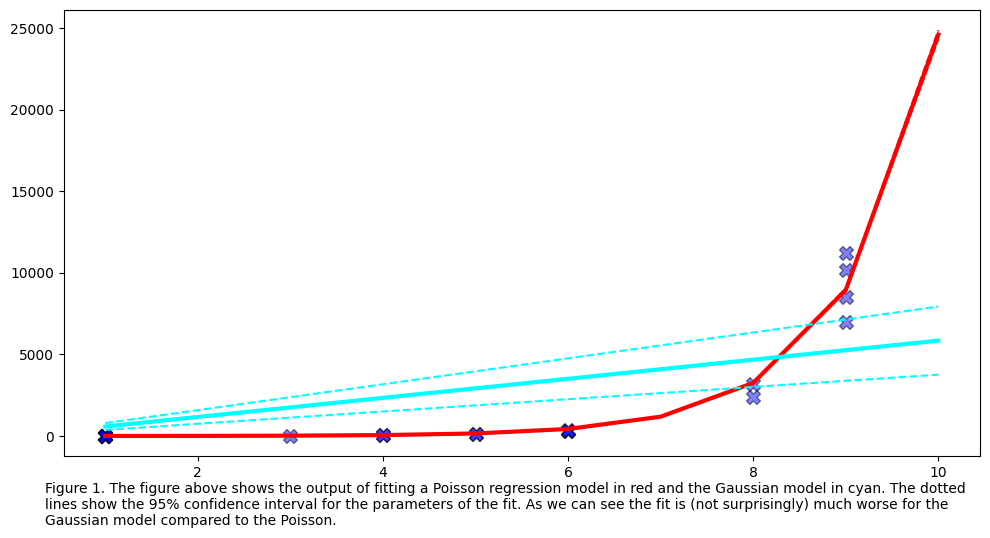

In [7]:
# generate data
x = np.array([[i] for i in np.random.choice(range(1,10), 20)])
y = np.array([np.exp(i) + np.random.normal(0,0.25*np.exp(i),1)[0] for i in x])

# make sure that the values are positive
y[y<0] = 0

# create models
m_poisson = sm.GLM(y,x, family=sm.families.Poisson())
m_poisson_results = m_poisson.fit()

m_gaussian = sm.GLM(y,x, family=sm.families.Gaussian())
m_gaussian_results = m_gaussian.fit()

# prediction
x_pred = np.arange(1,11).reshape(-1,1)
y_pred = m_poisson_results.get_prediction(x_pred).summary_frame(alpha=0.05)

y_pred_gaussian = m_gaussian_results.get_prediction(x_pred).summary_frame(alpha=0.05)

# plot results
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

plt.scatter(x,y,marker='X',color='blue',edgecolor='black',s=100,alpha=0.5,zorder=1)

plt.plot(x_pred,y_pred['mean'],color='red',linewidth=3.0,zorder=2)
plt.plot(x_pred,y_pred['mean_ci_lower'], color='red',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred['mean_ci_upper'], color='red',linestyle='--',zorder=2)

plt.plot(x_pred,y_pred_gaussian['mean'],color='cyan',linewidth=3.0,zorder=2)
plt.plot(x_pred,y_pred_gaussian['mean_ci_lower'], color='cyan',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred_gaussian['mean_ci_upper'], color='cyan',linestyle='--',zorder=2)

fig.text(.05, -.06, "Figure 1. The figure above shows the output of fitting a Poisson regression model in red and the Gaussian model in cyan. The dotted\nlines show the 95% confidence interval for the parameters of the fit. As we can see the fit is (not surprisingly) much worse for the\nGaussian model compared to the Poisson.")

plt.tight_layout()

The important part of the code above is the `m_poisson = sm.GLM(y,x, family=sm.families.Poisson())` call where we specify the distribution of the of the response variable. Statsmodels currently implements the following distributions, Binomial, Gamma, Gaussian, InverseGaussian, NegativeBinomial, Poisson, Tweedie which should give you a rich playground of models to work with.

# Basis-function Models

In the framework we have described above, the linear prediction is directly on the explanatory variables. However, we can generalise this slightly if we instead want to perform the regression over a set of basis functions. In statistics, we often refer to the matrix of the explanatory variables as the design matrix of the data. We can easily "design" a matrix that maps the explanatory variables to a "feature space" and then perform the regression over this domain instead.

In Figure 1, the cyan plot uses only a single parameter in its prediction and is therefore only able to parametrise lines that intersect at $(0, 0)$. In order to also parametrise the intersection of the line in the model, we require an expansion of the input domain with a constant one, as follows:

$$
X =
\begin{bmatrix}
x_0 & 1 \\
x_1 & 1 \\
\vdots & \vdots \\
x_N & 1 \\
\end{bmatrix}
$$

Using the above as the explanatory variables, we will be able to fit both the intersection and the slope. However, we can take this concept further and generalise this to perform regression over a different expanded explanatory space. Say that we know that the relationship between the response and the explanatory variables is:

$$
y = \beta_0 \sin(x) + \beta_1 \sin\left(\frac{x^2}{40}\right) + \beta_2 x.
$$

We can now create a new design matrix that includes all the functions we need and apply the GLM framework as before:

$$
\begin{bmatrix}
\sin(x_0) & \sin\left(\frac{x_0^2}{40}\right) & x_0 \\
\sin(x_1) & \sin\left(\frac{x_1^2}{40}\right) & x_1 \\
\vdots & \vdots & \vdots \\
\sin(x_N) & \sin\left(\frac{x_N^2}{40}\right) & x_N \\
\end{bmatrix}
$$


Below we will implement this using the `OLS` model which is just a Gaussian response and an identity link function. The motivation for using `OLS` rather than `GLM` is that the former provides easier means of analysing
predictions.

The resulting figure shows fitting a linear Gaussian model to a non-linear function. The prediction in red shows the model where the design matrix is directly on the explanatory variables while the cyan uses a design matrix of non-linear functions.

In [8]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

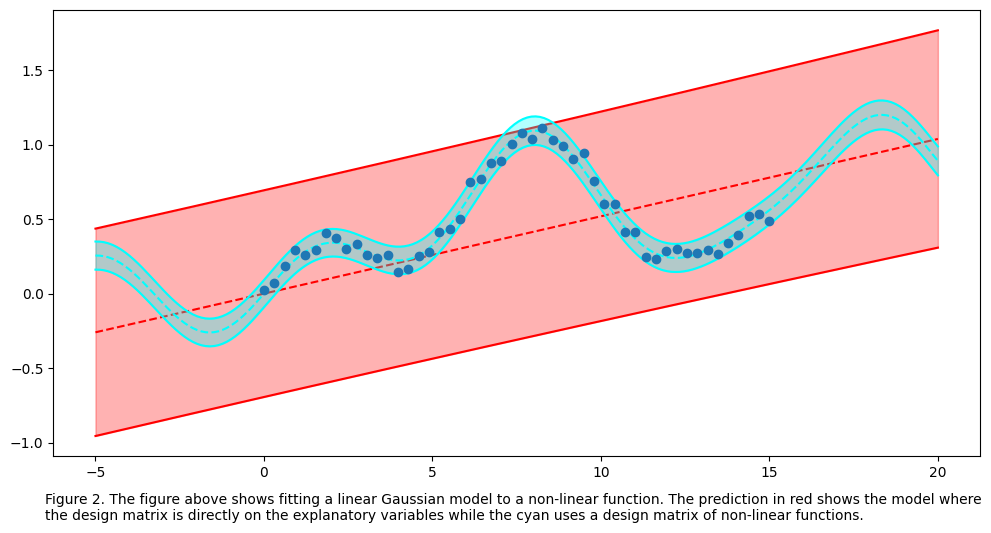

In [9]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Fit a simple linear model
m_linear = sm.OLS(y, x)
results = m_linear.fit()

# Design matrix with basis functions
design = np.concatenate((np.sin(x).reshape(-1, 1), np.sin(x**2 / 40).reshape(-1, 1), x.reshape(-1, 1)), axis=1)
m_linear_basis = sm.OLS(y, design)
results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((np.sin(x_pred), np.sin(x_pred**2 / 40), x_pred), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Linear model predictions
ax.plot(x_pred, y_pred_linear['mean'], color='red', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'], color='red', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'], color='red', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'], y_pred_linear['obs_ci_upper'], color='red', alpha=0.3, zorder=1)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)

fig.text(.05, -.05, "Figure 2. The figure above shows fitting a linear Gaussian model to a non-linear function. The prediction in red shows the model where\nthe design matrix is directly on the explanatory variables while the cyan uses a design matrix of non-linear functions.")

plt.tight_layout()
plt.show()


The figure above shows fitting a linear Gaussian model to a non-linear function. The prediction
in red shows the model where the design matrix is directly on the explanatory variables while the cyan uses
a design matrix of non-linear functions.

In [10]:
print(results_basis.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2592.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):                    3.49e-52
Time:                        10:15:58   Log-Likelihood:                          85.315
No. Observations:                  50   AIC:                                     -164.6
Df Residuals:                      47   BIC:                                     -158.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [11]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.636
Model:                            OLS   Adj. R-squared (uncentered):              0.629
Method:                 Least Squares   F-statistic:                              85.66
Date:                Thu, 21 Nov 2024   Prob (F-statistic):                    2.46e-12
Time:                        10:15:58   Log-Likelihood:                         -17.281
No. Observations:                  50   AIC:                                      36.56
Df Residuals:                      49   BIC:                                      38.47
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Furthermore, if we look at the log-likelihood of the two models we can see that it is substantially higher
for the second models compared to the first. This indicates, as we can see visually, that the second design
matrix results in a much better fit to the data.

While the example above worked well maybe it felt a bit contrived as we basically needed to know the function a-priori. So how about using a design matrix with additional basis function $-np.sin(x)$.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [13]:
%pip uninstall --yes fynesse
%pip install git+https://github.com/MatthewGregson123/fynesse_template.git

Found existing installation: fynesse 0.1.0
Uninstalling fynesse-0.1.0:
  Successfully uninstalled fynesse-0.1.0
  Cloning https://github.com/MatthewGregson123/fynesse_template.git to /tmp/pip-req-build-bfl70ofu
  Running command git clone --filter=blob:none --quiet https://github.com/MatthewGregson123/fynesse_template.git /tmp/pip-req-build-bfl70ofu
  Resolved https://github.com/MatthewGregson123/fynesse_template.git to commit 8f63956fb59047ecd5c3de73c34978986b17fee3
  Preparing metadata (setup.py) ... done
  Created wheel for fynesse: filename=fynesse-0.1.0-py3-none-any.whl size=13143 sha256=ee7e97845e1f8f6d9403079c84e6c67731a9f29cd76214791bd9b14b9a096d0d
  Stored in directory: /tmp/pip-ephem-wheel-cache-d0p7u3hh/wheels/6d/38/72/a88141a1f0e6376f18a1caf6f372928308ffe7640bc9f7c52f
Successfully built fynesse


In [14]:
%pip install PyMySQL
%pip install osmnx

In [15]:

import requests
import zipfile
import pymysql
import csv
import time
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt

# Imports fynesse
import fynesse


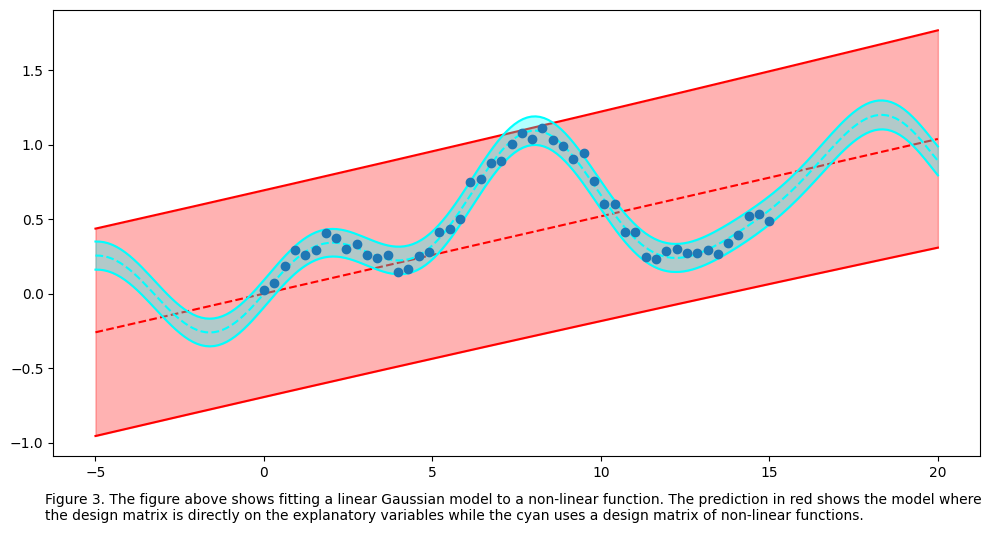

In [16]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Fit a simple linear model
m_linear = sm.OLS(y, x)
results = m_linear.fit()

# Design matrix with additional basis function -np.sin(x)
design = np.concatenate((
    np.sin(x).reshape(-1, 1),
    np.sin(x**2 / 40).reshape(-1, 1),
    x.reshape(-1, 1),
    -np.sin(x).reshape(-1, 1)
), axis=1)
m_linear_basis = sm.OLS(y, design)
results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((
    np.sin(x_pred),
    np.sin(x_pred**2 / 40),
    x_pred,
    -np.sin(x_pred)
), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Linear model predictions
ax.plot(x_pred, y_pred_linear['mean'], color='red', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'], color='red', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'], color='red', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'], y_pred_linear['obs_ci_upper'], color='red', alpha=0.3, zorder=1)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)

fig.text(.05, -.05, "Figure 3. The figure above shows fitting a linear Gaussian model to a non-linear function. The prediction in red shows the model where\nthe design matrix is directly on the explanatory variables while the cyan uses a design matrix of non-linear functions.")

plt.tight_layout()
plt.show()

In [17]:
print(results_basis.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2592.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):                    3.49e-52
Time:                        10:16:27   Log-Likelihood:                          85.315
No. Observations:                  50   AIC:                                     -164.6
Df Residuals:                      47   BIC:                                     -158.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As you can see from the the last example if we have multiple possible explanations we end up with a model where there are several symmetric explanations that cannot be differentiated under the objective function.
To overcome we have to encode a *preference* to the solution we want.

# Regularisation

In order to encode a preference towards specific solutions, we will include an additional term in the objective that depends only on the parameters $\beta$. This is commonly done using an $L_p$-norm:

$$
\hat{\beta} = \arg \max_{\beta} \prod_{i=1}^{N} p(y_i | x_i, \beta) + \alpha \left( \sum_{j=1}^{d} |\beta_j|^p \right)^{\frac{1}{p}}.
$$

The two most commonly used norms are the $L_2$, referred to as *ridge regression*, as it encodes a preference towards solutions where the parameters take equally large values, and $L_1$, referred to as *lasso*, as it prefers solutions that "home in" on a few active parameters to explain the data.

The following plot shows the regularisation surfaces of $L_2$ in blue and $L_1$ regularisation in red.

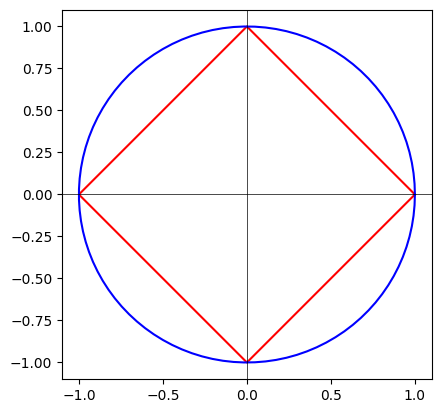

In [18]:
plt.plot([1, 0, -1, 0, 1], [0, 1, 0, -1, 0], 'r')  # L1
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'b')  # L2

plt.gca().set_aspect('equal', 'box'), plt.axhline(0, color='k', linewidth=0.5), plt.axvline(0, color='k', linewidth=0.5)
plt.show()

In `statsmodels` we can use the regularisation above by changing the call to fit the model from `fit` to `fit_regularised`. Taking two additional scalar parameters `alpha` and `L1_wt` where the former sets the strength of regularizer and the latter balances the L1 and L2 regularization.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1492: UserWarning: GLM ridge optimization may have failed, |grad|=0.011856
  warnings.warn(msg)


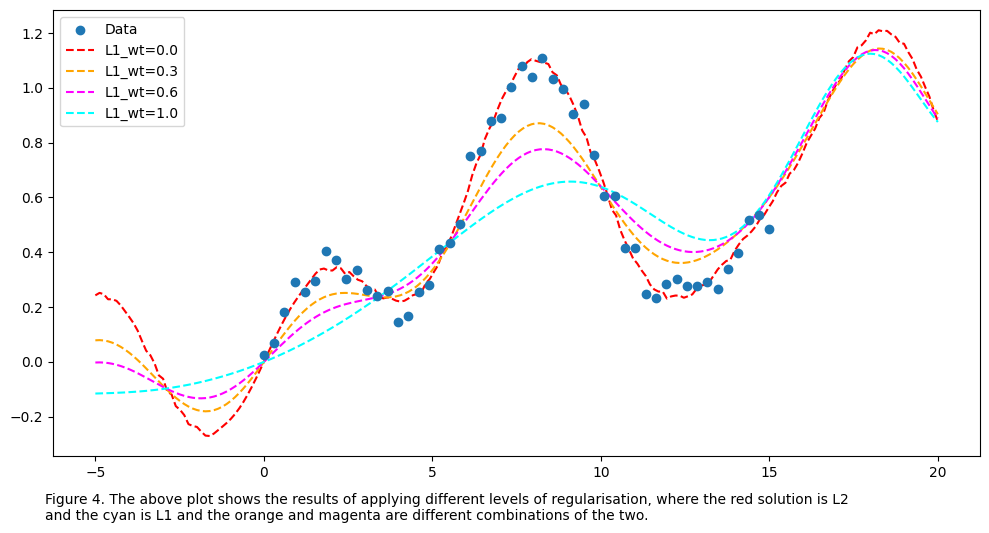

In [19]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Create design matrix
design = np.concatenate((np.sin(x).reshape(-1, 1),
                         np.sin(x**2 / 40).reshape(-1, 1),
                         x.reshape(-1, 1),
                         np.sin(x**2 / 20).reshape(-1, 1),
                         np.sin(x**3).reshape(-1, 1)), axis=1)

# Fit regularized models with different L1 weights
m_linear_basis = sm.GLM(y, design, family=sm.families.Gaussian())
results_basis_0 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.0)
results_basis_1 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.3)
results_basis_2 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.6)
results_basis_3 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=1.0)

# Prediction data
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((np.sin(x_pred),
                              np.sin(x_pred**2 / 40),
                              x_pred,
                              np.sin(x_pred**2 / 20),
                              np.sin(x_pred**3)), axis=1)

# Predictions for each model
y_pred_0 = results_basis_0.predict(design_pred)
y_pred_1 = results_basis_1.predict(design_pred)
y_pred_2 = results_basis_2.predict(design_pred)
y_pred_3 = results_basis_3.predict(design_pred)

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, zorder=2, label="Data")
ax.plot(x_pred, y_pred_0, color='red', linestyle='--', zorder=1, label="L1_wt=0.0")
ax.plot(x_pred, y_pred_1, color='orange', linestyle='--', zorder=1, label="L1_wt=0.3")
ax.plot(x_pred, y_pred_2, color='magenta', linestyle='--', zorder=1, label="L1_wt=0.6")
ax.plot(x_pred, y_pred_3, color='cyan', linestyle='--', zorder=1, label="L1_wt=1.0")

ax.legend()
fig.text(.05, -.05, "Figure 4. The above plot shows the results of applying different levels of regularisation, where the red solution is L2\nand the cyan is L1 and the orange and magenta are different combinations of the two.")
plt.tight_layout()
plt.show()

# Localised Basis Functions

Another way to think about designing a set of basis functions is to make them connected to the data, we could think about placing a non-linear transformation of each point

$$
y_i = \sum_{j=1}^{N} \beta_j \, \phi(x_j , x_i)
$$

$$
\phi(x_j , x_i) = e^{- (x_i - x_j)^T (x_i - x_j)}
$$

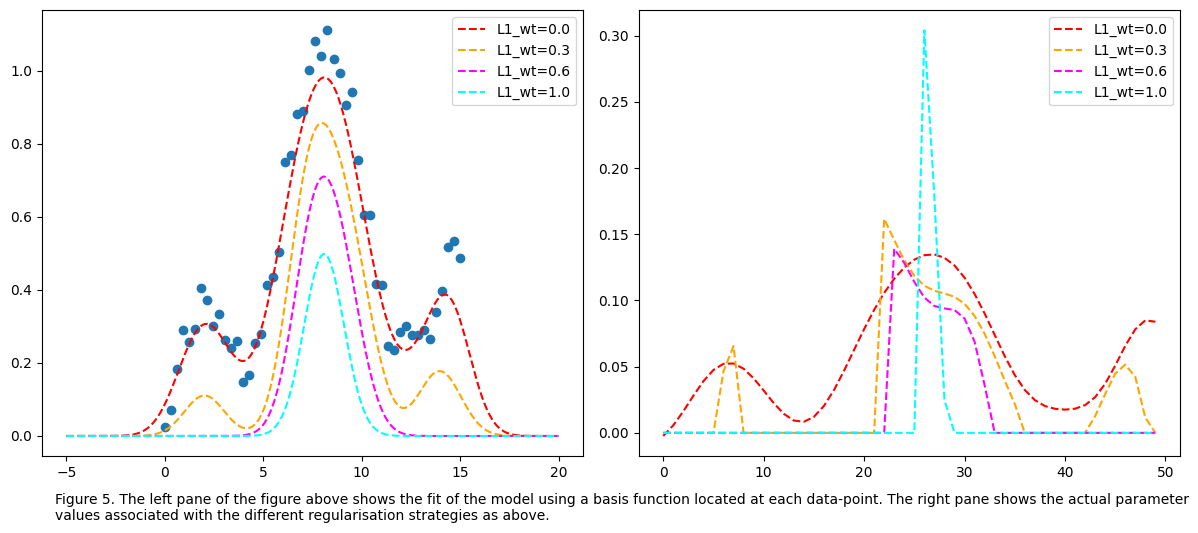

In [20]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Define the RBF kernel function for localized basis functions
def rbf_kernel(x1, x2, length_scale=1.0):
    return np.exp(-((x1 - x2.T) ** 2) / (2 * length_scale ** 2))

# Create the design matrix using RBF kernel
phi = rbf_kernel(x[:, np.newaxis], x[:, np.newaxis])

# Fit regularized models with different L1 weights
m_rbf_basis = sm.OLS(y, phi)
results_rbf_0 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.0)
results_rbf_1 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.3)
results_rbf_2 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.6)
results_rbf_3 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=1.0)

# Prediction data
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
phi_pred = rbf_kernel(x_pred, x)

# Predictions for each model
y_pred_rbf_0 = results_rbf_0.predict(phi_pred)
y_pred_rbf_1 = results_rbf_1.predict(phi_pred)
y_pred_rbf_2 = results_rbf_2.predict(phi_pred)
y_pred_rbf_3 = results_rbf_3.predict(phi_pred)

# Extract parameter values for each model
params_0 = results_rbf_0.params
params_1 = results_rbf_1.params
params_2 = results_rbf_2.params
params_3 = results_rbf_3.params

# Plot model fit and parameter values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Model fit with different regularization levels
ax1.scatter(x, y)
ax1.plot(x_pred, y_pred_rbf_0, '--', color='red', label="L1_wt=0.0")
ax1.plot(x_pred, y_pred_rbf_1, '--', color='orange', label="L1_wt=0.3")
ax1.plot(x_pred, y_pred_rbf_2, '--', color='magenta', label="L1_wt=0.6")
ax1.plot(x_pred, y_pred_rbf_3, '--', color='cyan', label="L1_wt=1.0")
ax1.legend()

# Parameter values for each regularization strategy
ax2.plot(range(len(params_0)), params_0, '--', color='red', label="L1_wt=0.0")
ax2.plot(range(len(params_1)), params_1, '--', color='orange', label="L1_wt=0.3")
ax2.plot(range(len(params_2)), params_2, '--', color='magenta', label="L1_wt=0.6")
ax2.plot(range(len(params_3)), params_3, '--', color='cyan', label="L1_wt=1.0")
ax2.legend()

fig.text(.05, -.05, "Figure 5. The left pane of the figure above shows the fit of the model using a basis function located at each data-point. The right pane shows the actual parameter\nvalues associated with the different regularisation strategies as above.")

plt.tight_layout()
plt.show()

As we can see from the figure above, the interpretation of the solution for the localised basis function model changes slightly. What we can now say is something similar to, "how important is each of the training data points for prediction". Especially interesting is the very strongly regularised solution shown in cyan. This can be interpreted as "if we want to predict the data, which is the single most representative point". The notion of a localised basis function can through this interpretation provide a rich explanation that is often very interpretable.

The type of data-centric basis functions that we explained above are very commonly used and if continue your study of machine learning during the year you will see a lot more of these basis functions as they are the foundation of a large range of different models from Support Vector Machines Vapnik, 1999 to Gaussian processes Rasmussen et al., 2006. Importantly as they solve an $N \times N$ regression problem the crucial ingredient is how do we regularise to solution space so that we can recover a solution.


# Applying Model Framework

You should now try out the model framework that we described above on a dataset derived from the 2021 UK Census Dataset.

Let's start by downloading the data.

In [21]:
import requests
import zipfile
import io
import os
import pandas as pd


def download_census_data(code, base_dir=''):
  url = f'https://www.nomisweb.co.uk/output/census/2021/census2021-{code.lower()}.zip'
  extract_dir = os.path.join(base_dir, os.path.splitext(os.path.basename(url))[0])

  if os.path.exists(extract_dir) and os.listdir(extract_dir):
    print(f"Files already exist at: {extract_dir}.")
    return

  os.makedirs(extract_dir, exist_ok=True)
  response = requests.get(url)
  response.raise_for_status()

  with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall(extract_dir)

  print(f"Files extracted to: {extract_dir}")

def load_census_data(code, level='msoa'):
  return pd.read_csv(f'census2021-{code.lower()}/census2021-{code.lower()}-{level}.csv')

In [22]:
download_census_data('TS007') # Age by single year of age

age_df = load_census_data('TS007', level='ltla')
# Preparing the columns we want
age_df = age_df.drop(age_df.columns[[0,2,3,4,10,16,23,28,34,45,61,77,88,99,115]], axis=1).set_index('geography')
age_df.columns = range(100)

Files already exist at: census2021-ts007.


Below we will plot the overall age structure of the UK population in 2021. This profile is not very straightforward, and has historical reasons. Have a look online to understand the data better - you should see a similar chart [here](https://en.wikipedia.org/wiki/Demographics_of_England).

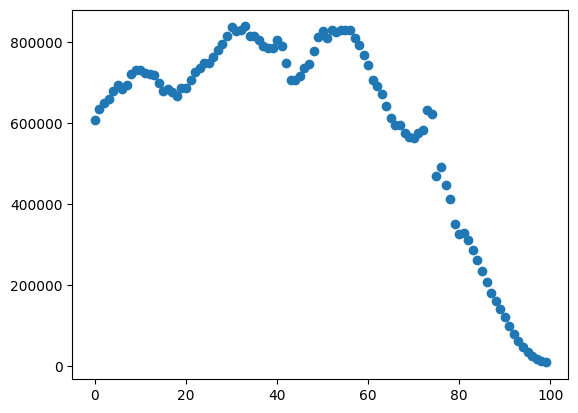

In [23]:
plt.scatter(range(100), age_df.sum(axis=0))
plt.show()

The data looks very different when we look at individual cities. For example, Cambridge has a very different age profile than most of the UK.

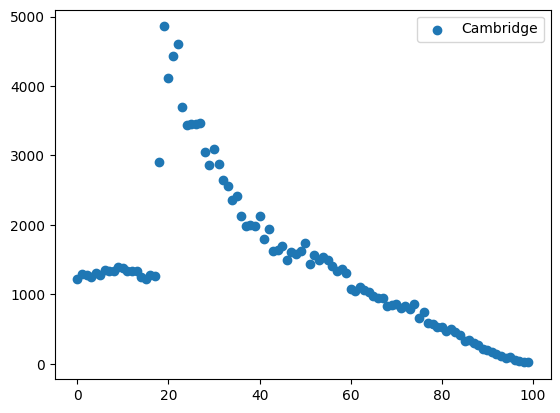

In [24]:
x_values = range(100)

plt.scatter(x_values, age_df.loc['Cambridge'], label='Cambridge')

plt.legend()
plt.show()


Now try to use the framework that we have derived to explain the two data-sets above. There is no right or wrong answer here, what we are looking for is a motivation of why you have made the choices that you have made
and how this effects the conclusions that you can draw.

### Exercise 1

Would it make sense to split up the data-set in different regions and fit separate models If so, what is the criteria that you split the data using?

### Exercise 1

Write your answer to exercise 1 here

In [25]:
import math

In [26]:
def create_cambridge_design(xs):
  age_cutoff = 18
  result = np.concatenate((
      np.array([1 if xs[i] < age_cutoff else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([0 if xs[i] < age_cutoff else 1 for i in range(len(xs))]).reshape(-1,1),
      np.array([0 if xs[i] < age_cutoff else xs[i] for i in range(len(xs))]).reshape(-1,1),
  ), axis=1)
  return result

0.9757026026449604


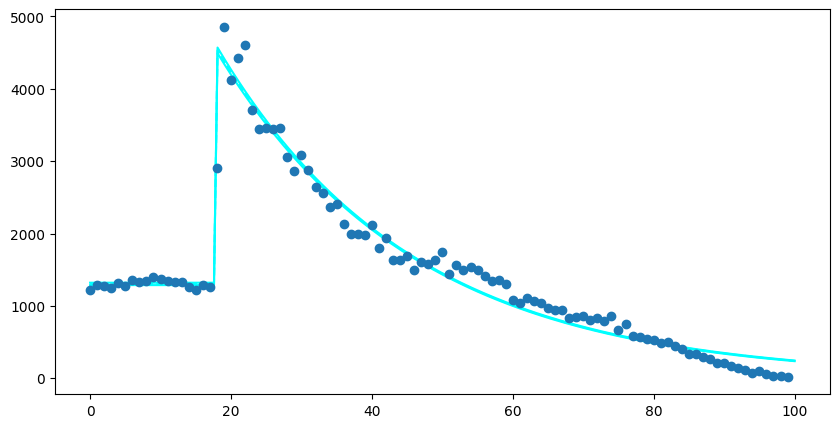

In [27]:
x = np.arange(0, len(age_df.loc['Cambridge']))
y = age_df.loc['Cambridge'].to_numpy()

age_cutoff = 18

design = create_cambridge_design(np.arange(0, len(y)))

# cambridge_model = sm.OLS(y, design)
cambridge_model = sm.GLM(y, design, family=sm.families.Poisson())
fitted_cambridge_model = cambridge_model.fit()

x_pred = np.linspace(0,100,200).reshape(-1, 1)

design_pred = create_cambridge_design(x_pred.reshape(200))

y_pred = fitted_cambridge_model.get_prediction(design_pred).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

ax.plot(x_pred, y_pred['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred['mean_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred['mean_ci_upper'], color='cyan', linestyle='-', zorder=1)

# print(fitted_cambridge_model.summary())
y_pred = fitted_cambridge_model.get_prediction(design).summary_frame(alpha=0.05)
print(np.corrcoef(y, y_pred['mean'])[0][1])

In [28]:
def create_UK_design(xs):
  result = np.concatenate((
      np.array([1 if xs[i] < 10 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([1 if 10 <= xs[i] < 20 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([1 if 20 <= xs[i] < 30 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([1 if 30 <= xs[i] < 40 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([1 if 40 <= xs[i] < 50 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([1 if 50 <= xs[i] < 60 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([1 if 60 <= xs[i] < 70 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([1 if 70 <= xs[i] < 80 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([1 if 80 <= xs[i] else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([xs[i] if xs[i] < 10 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([xs[i] if 10 <= xs[i] < 20 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([xs[i] if 20 <= xs[i] < 30 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([xs[i] if 30 <= xs[i] < 40 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([xs[i] if 40 <= xs[i] < 50 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([xs[i] if 50 <= xs[i] < 60 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([xs[i] if 60 <= xs[i] < 70 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([xs[i] if 70 <= xs[i] < 80 else 0 for i in range(len(xs))]).reshape(-1,1),
      np.array([xs[i] if 80 <= xs[i] else 0 for i in range(len(xs))]).reshape(-1,1),
  ), axis=1)
  return result

0.9946976759950639


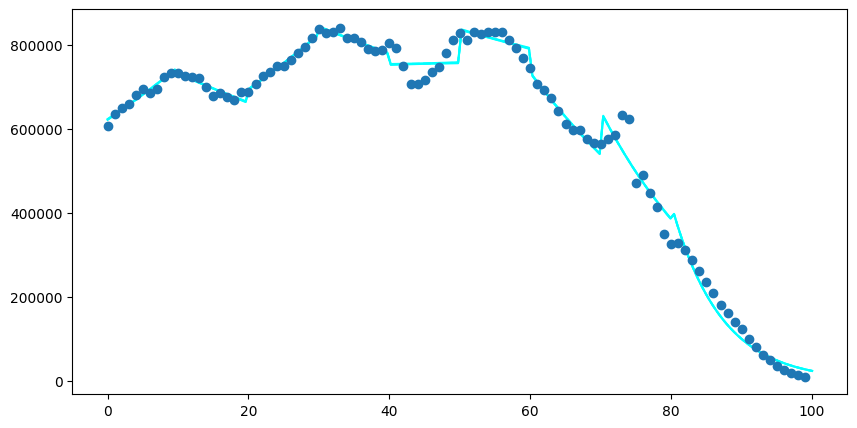

In [29]:
UK_x = np.arange(0, len(age_df.sum(axis=0)))
UK_y = age_df.sum(axis=0).to_numpy()

UK_design = create_UK_design(np.arange(0, len(UK_y)))

UK_model = sm.GLM(UK_y, UK_design, family=sm.families.Poisson())
fitted_UK_model = UK_model.fit()

x_pred = np.linspace(0,100,200).reshape(-1, 1)

design_pred = create_UK_design(x_pred.reshape(200))

y_pred = fitted_UK_model.get_prediction(design_pred).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(UK_x, UK_y, zorder=2)

ax.plot(x_pred, y_pred['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred['mean_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred['mean_ci_upper'], color='cyan', linestyle='-', zorder=1)

y_pred = fitted_UK_model.get_prediction(UK_design).summary_frame(alpha=0.05)
print(np.corrcoef(UK_y, y_pred['mean'])[0][1])
#print(fitted_UK_model.summary())

### Exercise 2

What would be a sensible design matrix?

### Exercise 2

Write your answer to exercise 2 here

In [30]:
# Cambridge has a large university and is such is heavily dominated by students. As such when people turn 18/19 and go to uni we expect to see a large
# rise in people in cambridge. This is why it makes sense to split under 18s and over 18s into 2 seperate features.
# A lot of people will leave when they are done with Uni or drop out but some will stay longer leading to a sort of exponential decline.
# Also we don't expect a lot of under 18s to be moving in or out of cambridge hence why its relatively flat. This means that we don't need to
# include the data for that portion as its just constant anyway. For the over 18s we include the data and the one hot encoding.

# For the UK its such a large area that its hard to predict when people are immigrating or emmigrating.
# As such i believe a suitable design matrix would be to split it into age groups. i.e. each age group has its own gradient and intercept.
# We can expect that within an age group the change will be smaller and as such means the grouping will work as long as we have small enough groups.
# This is why i split the data into decades and will use those regions in the design matrix.

### Exercise 3

What GLM models would make sense to fit?

### Exercise 3

Write your answer to exercise 3 here

In [31]:
# A poisson GLM makes sense as you expect the number of people leaving or entering a town to be roughly a poisson distribution even if scaled up
# as such using a poisson GLM would make the most sense to fit.
# We are also measuring count of people which is positive which also fits poisson (poisson can't be negative)

During the check-session we will ask you a few questions on how you have reasoned when fitting the data.
Again, what we are looking for is motivation not "the best fit".

# Practical Modelling

## Linear modelling

You probably inferred in the previous exercise, that age-profiles of individual cities are heavilly impacted by students. Let's use data from the 2021 Census to try and predict age profile information of all cities.

What we actually will be predicting, is the share of population in a given city that is of a certain age, given NS-SEC information. Let's normalise the `age_df` and select the share of 21-year-olds in each city. This is the value we are trying to predict.

In [32]:
norm_age_df = age_df.div(age_df.sum(axis=1), axis=0)
y = norm_age_df[1].to_numpy()
print(y)

[0.01033441 0.01195274 0.00986726 0.01057151 0.00972306 0.00921308
 0.00820943 0.01020099 0.01015714 0.00992907 0.0095795  0.01009658
 0.0110228  0.01004096 0.0130242  0.01008489 0.00965755 0.00962053
 0.0085407  0.01016426 0.00995509 0.0084268  0.00814969 0.00694331
 0.01259563 0.00949039 0.0078925  0.01229598 0.00953887 0.01303598
 0.01196807 0.00882296 0.00984971 0.0093857  0.00885024 0.00845254
 0.01260861 0.01124877 0.01278711 0.01293164 0.01295196 0.01305727
 0.01077319 0.01172127 0.01083354 0.01041942 0.01262062 0.01073196
 0.01012494 0.00967201 0.01002568 0.0120125  0.00829857 0.01061694
 0.00969718 0.00815229 0.00790847 0.00799656 0.00826573 0.00807975
 0.00848465 0.00863869 0.01003599 0.01111493 0.01137124 0.01061876
 0.01071013 0.01338637 0.01053396 0.01132439 0.01128341 0.01123936
 0.01119799 0.01214624 0.00728664 0.01118741 0.01128081 0.01103966
 0.00932824 0.01001769 0.00930897 0.00729927 0.00950584 0.0094598
 0.00903251 0.01023502 0.01068874 0.00973143 0.0093435  0.00993

### Exercise 4

We don't have any data to make a model yet - let's change that. Select features to use, starting with the relative student population of each city (`L15` in `TS062`).

Make a LinearRegression model to find the relationship between the student population in a city, and the percentage of 21 year olds there. Use the model to make predictions and examine the predictive power by plotting the correlation of `y` and `y_pred`.

### Exercise 4

Write your answer to exercise 4 here

In [33]:
download_census_data('TS062') # Age by single year of age

students_df = load_census_data('TS062', level='ltla')
student_column_name = 'National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students'
students_df['geography'].to_numpy()

Files already exist at: census2021-ts062.


array(['Hartlepool', 'Middlesbrough', 'Redcar and Cleveland',
       'Stockton-on-Tees', 'Darlington', 'Halton', 'Warrington',
       'Blackburn with Darwen', 'Blackpool',
       'Kingston upon Hull, City of', 'East Riding of Yorkshire',
       'North East Lincolnshire', 'North Lincolnshire', 'York', 'Derby',
       'Leicester', 'Rutland', 'Nottingham', 'Herefordshire, County of',
       'Telford and Wrekin', 'Stoke-on-Trent',
       'Bath and North East Somerset', 'Bristol, City of',
       'North Somerset', 'South Gloucestershire', 'Plymouth', 'Torbay',
       'Swindon', 'Peterborough', 'Luton', 'Southend-on-Sea', 'Thurrock',
       'Medway', 'Bracknell Forest', 'West Berkshire', 'Reading',
       'Slough', 'Windsor and Maidenhead', 'Wokingham', 'Milton Keynes',
       'Brighton and Hove', 'Portsmouth', 'Southampton', 'Isle of Wight',
       'County Durham', 'Cheshire East', 'Cheshire West and Chester',
       'Shropshire', 'Cornwall', 'Isles of Scilly', 'Wiltshire',
       'Bedford'

[[0.010984368398817067, 0.01373870743571925, 0.009383790436005625, 0.009223365180143056, 0.009621004778030339, 0.010594655187177431, 0.009514734326999659, 0.011285485288794663, 0.009347318851371956, 0.01510270740002697, 0.007965344175944952, 0.009578190021603502, 0.009243266504359308, 0.024826769906048873, 0.015212574197177925, 0.022154140061708127, 0.008602622215723546, 0.03535469036831923, 0.008252263623187631, 0.0118493759939621, 0.01345565749235474, 0.022131537570340948, 0.021617078571761247, 0.008446998546008447, 0.012212510073771, 0.01770403092631571, 0.00813527680045954, 0.009264179078895497, 0.00981242319552969, 0.012977902490354262, 0.009815373543333242, 0.009927828607148945, 0.011107139026918815, 0.009134912544049061, 0.008556116601096621, 0.018610578523782735, 0.010600572935727717, 0.007651298895971011, 0.008751317205664407, 0.009469756357593052, 0.023004811770608855, 0.02313403410238409, 0.023940017358320742, 0.007627716172040254, 0.01383974328272427, 0.00799193281358177, 0

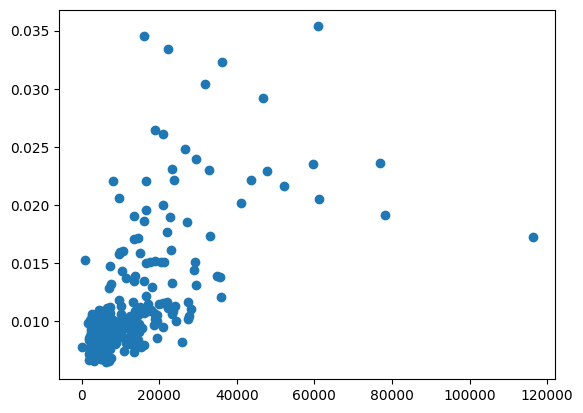

In [34]:
join_data = [[],[]]
for i in range(len(students_df)):
  if students_df.iloc[i]['geography'] in norm_age_df.index:
    join_data[0].append(norm_age_df.loc[students_df.iloc[i]['geography']][21])
    join_data[1].append(students_df.iloc[i][student_column_name])
print(join_data)
plt.scatter(join_data[1],join_data[0])
plt.show()

In [35]:
def create_design_matrix(xs):
  result = np.concatenate((
     np.ones(len(xs)).reshape(-1,1),
     np.array(xs).reshape(-1,1),
  ), axis= 1)
  return result

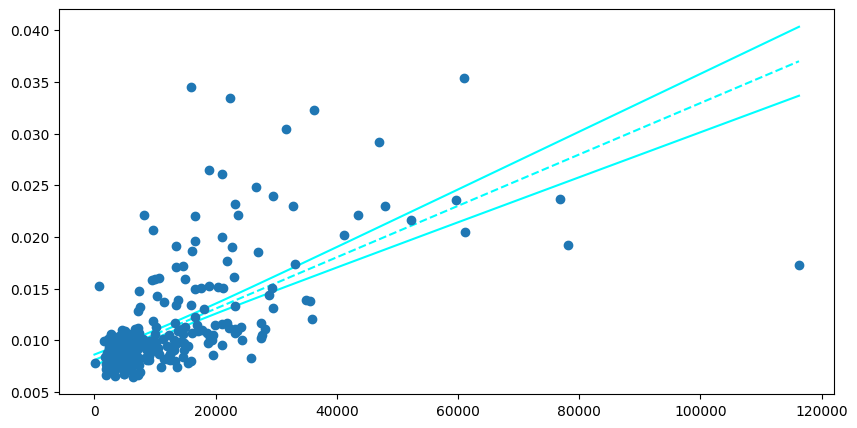

In [36]:
x = join_data[1]
y = join_data[0]

design = create_design_matrix(x)

model = sm.GLM(y, design, family=sm.families.Gaussian())
fitted_model = model.fit()

x_pred = np.linspace(0,max(x),200).reshape(-1, 1)
design_pred = create_design_matrix(x_pred.reshape(200))

y_pred = fitted_model.get_prediction(design_pred).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

ax.plot(x_pred, y_pred['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred['mean_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred['mean_ci_upper'], color='cyan', linestyle='-', zorder=1)

In [37]:
print(fitted_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  331
Model:                            GLM   Df Residuals:                      329
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                      1.3696e-05
Method:                          IRLS   Log-Likelihood:                 1384.7
Date:                Thu, 21 Nov 2024   Deviance:                    0.0045061
Time:                        10:16:36   Pearson chi2:                  0.00451
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5141
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0081      0.000     29.685      0.0

correlation coefficient:  0.6485748230565126


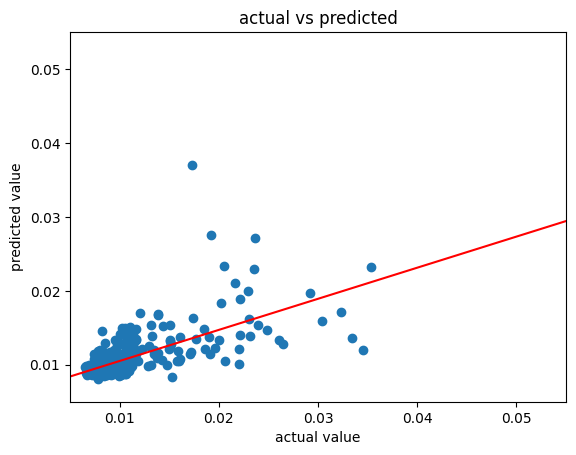

In [38]:
y_pred = fitted_model.get_prediction(design).summary_frame(alpha=0.05)

correlation = np.corrcoef(y, y_pred['mean'])[0][1]
print("correlation coefficient: ", correlation)

plt.scatter(y, y_pred['mean'])
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.xlim(0.005, 0.055)
plt.ylim(0.005, 0.055)
plt.title("actual vs predicted")

b, a = np.polyfit(y, y_pred['mean'], deg=1)
xs = np.linspace(0, 0.055, 100)
ys = a + b * xs
plt.plot(xs, ys, color='red')

plt.show()

### Exercise 5

Now repeat the above analysis using all 9 NS-SEC classification values as features. Interpret the results, including correlation. Does the new model perform better?

In [39]:
included_columns = ['National Statistics Socio-economic Classification (NS-SEC): L1, L2 and L3 Higher managerial, administrative and professional occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L4, L5 and L6 Lower managerial, administrative and professional occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L7 Intermediate occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L8 and L9 Small employers and own account workers',
       'National Statistics Socio-economic Classification (NS-SEC): L10 and L11 Lower supervisory and technical occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L12 Semi-routine occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L13 Routine occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L14.1 and L14.2 Never worked and long-term unemployed',
       'National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students']
norm_students_df = students_df[included_columns]
norm_students_df = norm_students_df.div(norm_students_df.sum(axis=1), axis=0)
#for i in range(len(norm_students_df)):
#  norm_students_df.iloc[i] = (norm_students_df.iloc[i] - min(norm_students_df.iloc[i]))/(max(norm_students_df.iloc[i]) - min(norm_students_df.iloc[i]))
norm_students_df

,"National Statistics Socio-economic Classification (NS-SEC): L1, L2 and L3 Higher managerial, administrative and professional occupations","National Statistics Socio-economic Classification (NS-SEC): L4, L5 and L6 Lower managerial, administrative and professional occupations",National Statistics Socio-economic Classification (NS-SEC): L7 Intermediate occupations,National Statistics Socio-economic Classification (NS-SEC): L8 and L9 Small employers and own account workers,National Statistics Socio-economic Classification (NS-SEC): L10 and L11 Lower supervisory and technical occupations,National Statistics Socio-economic Classification (NS-SEC): L12 Semi-routine occupations,National Statistics Socio-economic Classification (NS-SEC): L13 Routine occupations,National Statistics Socio-economic Classification (NS-SEC): L14.1 and L14.2 Never worked and long-term unemployed,National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students
0,0.070589,0.169376,0.110382,0.074914,0.067777,0.148033,0.157165,0.141004,0.060761
1,0.067467,0.152206,0.107383,0.069336,0.059322,0.139023,0.150608,0.153241,0.101415
2,0.073642,0.177317,0.110690,0.079196,0.079766,0.152420,0.149438,0.123819,0.053711
3,0.101304,0.196013,0.121568,0.075040,0.063857,0.127422,0.141004,0.113626,0.060167
4,0.103570,0.194620,0.123603,0.082890,0.059361,0.129198,0.152080,0.102060,0.052619
...,...,...,...,...,...,...,...,...,...
326,0.086748,0.189432,0.124850,0.076430,0.071358,0.147043,0.164244,0.088639,0.051255
327,0.158118,0.234781,0.107836,0.124324,0.052659,0.106609,0.109434,0.059152,0.047086
328,0.109925,0.193937,0.127897,0.075858,0.058255,0.123730,0.149235,0.098232,0.062932
329,0.099888,0.201793,0.101905,0.188055,0.059972,0.126031,0.116798,0.062576,0.042982


### Exercise 5

Write your answer to exercise 5 here

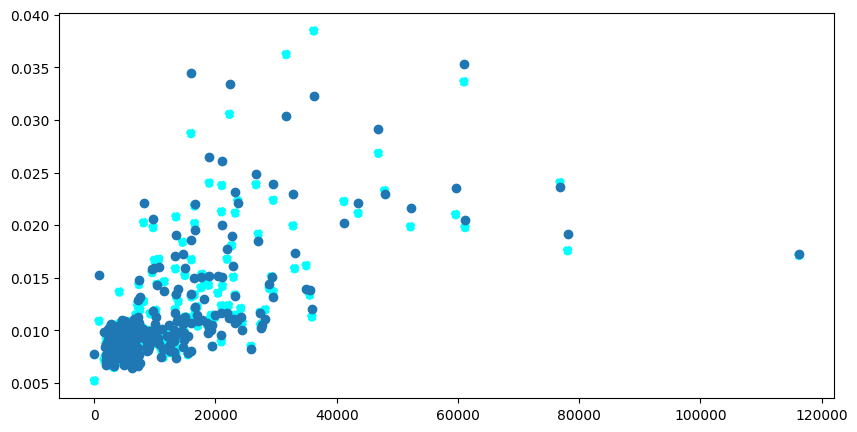

In [40]:
included_columns = ['National Statistics Socio-economic Classification (NS-SEC): L1, L2 and L3 Higher managerial, administrative and professional occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L4, L5 and L6 Lower managerial, administrative and professional occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L7 Intermediate occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L8 and L9 Small employers and own account workers',
       'National Statistics Socio-economic Classification (NS-SEC): L10 and L11 Lower supervisory and technical occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L12 Semi-routine occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L13 Routine occupations',
       'National Statistics Socio-economic Classification (NS-SEC): L14.1 and L14.2 Never worked and long-term unemployed',
       'National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students']
features = norm_students_df[included_columns].to_numpy()
#features = sm.add_constant(features)
#for i in range(len(features)):
#  features[i] = (features[i] - min(features[i]))/(max(features[i]) - min(features[i]))

model = sm.GLM(y, features, family=sm.families.Gaussian())
fitted_model = model.fit()

# x_pred = np.linspace(0,max(x),331).reshape(-1, 1)
# design_pred = create_design_matrix(x_pred.reshape(200))

y_pred = fitted_model.get_prediction(features).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

ax.scatter(x, y_pred['mean'], color='cyan', linestyle='--', zorder=1)
#ax.plot(x_pred, y_pred['mean_ci_lower'], color='cyan', linestyle='-', zorder=1)
#ax.plot(x_pred, y_pred['mean_ci_upper'], color='cyan', linestyle='-', zorder=1)


correlation coefficient:  0.971638397254832


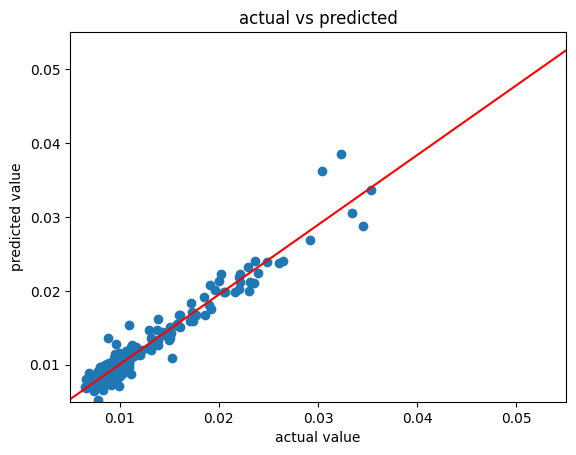

In [41]:
correlation = np.corrcoef(y, y_pred['mean'])[0][1]
print("correlation coefficient: ", correlation)

plt.scatter(y, y_pred['mean'])
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.xlim(0.005, 0.055)
plt.ylim(0.005, 0.055)
plt.title("actual vs predicted")

b, a = np.polyfit(y, y_pred['mean'], deg=1)
xs = np.linspace(0, 0.055, 100)
ys = a + b * xs
plt.plot(xs, ys, color='red')

plt.show()

## Regularisation

The prediction results achieved by your second model should be more accurate, with a correlation of about 97%. However, when using as many parameters as we are (9), we need to be wary of overfitting.

### Exercise 6

Examine if the model is overfitting using *k-fold cross-validation*.

- Randomly split the dataset into *k* subsets.
- Train a model, leaving one selected subset out for testing. Record the test performance on that subset.
- Iterate this for all subsets.

Do the results you get differ depending on the value of *k*? Plot this relationship. Does this match your expectations?

### Exercise 6

Write your answer to exercise 6 here

In [42]:
def k_fold_cross_validation(k, x_data, y_data, regularised, alpha, l1_wt, MSE):
  # Define size of subset
  subset_size = len(x_data) // k
  MSEs = []
  # For each combination of train and test
  for i in range(k):
    # Split data into test and train for x and y
    test_data_x = x_data[i * subset_size : (i + 1) * subset_size]
    train_data_x = np.concatenate((x_data[:i * subset_size], x_data[(i + 1) * subset_size:]))

    test_data_y = y_data[i * subset_size : (i + 1) * subset_size]
    train_data_y = np.concatenate((y_data[:i * subset_size], y_data[(i + 1) * subset_size:]))

    # Define the model using the training data
    model = sm.GLM(train_data_y, train_data_x, family=sm.families.Gaussian())
    if not regularised:
      # If we don't want a regularised model then fit normally
      fitted_model = model.fit()

      # Get the models prediction for the test data
      y_pred = fitted_model.get_prediction(test_data_x).summary_frame(alpha=0.05)
      # Get the truth for the test data
      y_true = y_data[i * subset_size : (i+1)*subset_size]
      if MSE:
        # if we want the MSE then add MSE to MSEs
        MSEs.append((np.mean((y_true - y_pred['mean']) ** 2)) ** 0.5)
      else:
        # otherwise we want correlation so add the correlation
        MSEs.append(np.corrcoef(y_true, y_pred['mean'])[0][1])
    else:
      # If we want a regularized model then fit with alpha and l1_wt
      fitted_model = model.fit_regularized(alpha=alpha, L1_wt=l1_wt)

      # Get the predictions from the model and the truth
      y_pred = fitted_model.predict(test_data_x)
      y_true = y_data[i * subset_size : (i+1)*subset_size]

      if MSE:
        # Append MSE if thats what we want
        MSEs.append((np.mean((y_true - y_pred) ** 2)) ** 0.5)
      else:
        # Otherwise append correlation coefficient
        MSEs.append(np.corrcoef(y_true, y_pred)[0][1])

  MSEs = np.array(MSEs)
  # Return mean and Standard Deviation of result
  return np.mean(MSEs), np.std(MSEs)


mean, std = fynesse.address.k_fold_cross_validation(10, features, y, False, 0, 0, MSE=True)
print("MSE: ", mean, " +/- ", std)


MSE:  0.001210809839217839  +/-  0.00037388952145128035


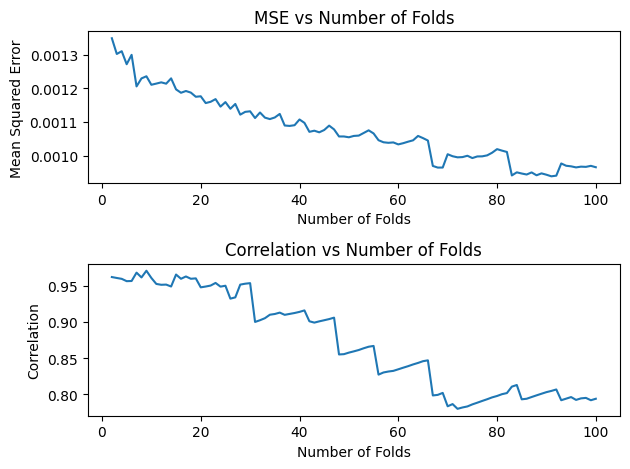

In [43]:
xs = []
correlation = []
ys = []

for i in range(1,100):
  xs.append(i + 1)
  mean, _ = fynesse.address.k_fold_cross_validation(i + 1, features, y, False, 0, 0, MSE=True)
  ys.append(mean)
  mean, _ = fynesse.address.k_fold_cross_validation(i + 1, features, y, False, 0, 0, MSE=False)
  correlation.append(mean)


fig, axs = plt.subplots(2)

axs[0].plot(xs, ys)
axs[0].set_ylabel("Mean Squared Error")
axs[0].set_xlabel("Number of Folds")
axs[0].set_title("MSE vs Number of Folds")

axs[1].plot(xs, correlation)
axs[1].set_ylabel("Correlation")
axs[1].set_xlabel("Number of Folds")
axs[1].set_title("Correlation vs Number of Folds")

plt.tight_layout()
plt.show()

### Exercise 7

If you found evidence of overfitting, address this by employing both L1 and L2 regularisation. Compare the results against your baseline model. How did you choose alpha values? What do the results say about potential feature selection?

### Exercise 7

Write your answer to exercise 7 here

In [44]:
def fit_regularised(x_data, y_data, alpha, l1_wt):
  model = sm.GLM(y_data, x_data, family=sm.families.Gaussian())
  fitted_model = model.fit_regularized(alpha=alpha, L1_wt=l1_wt)

  y_pred = fitted_model.predict(x_data)
  return y_pred

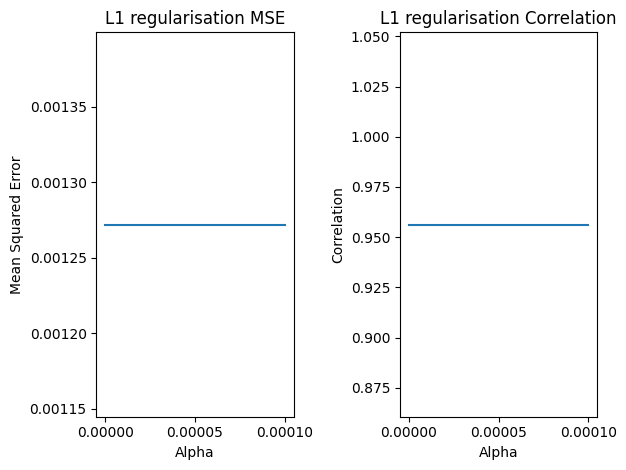

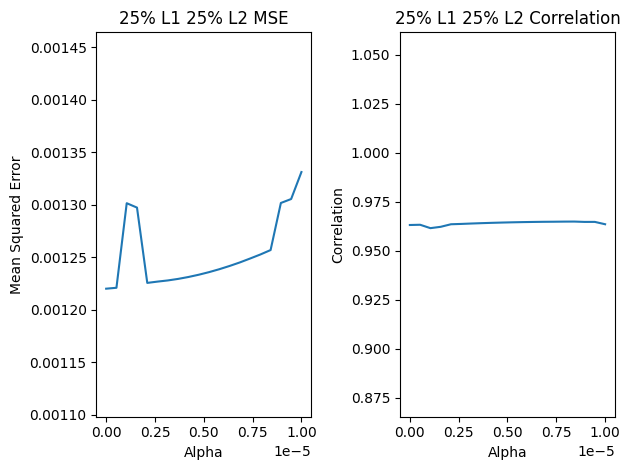

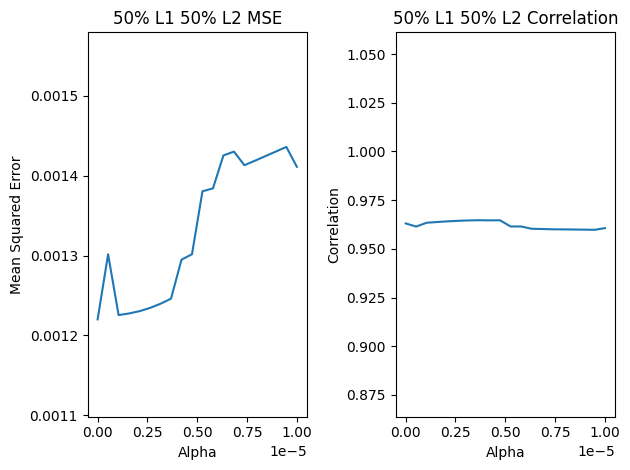

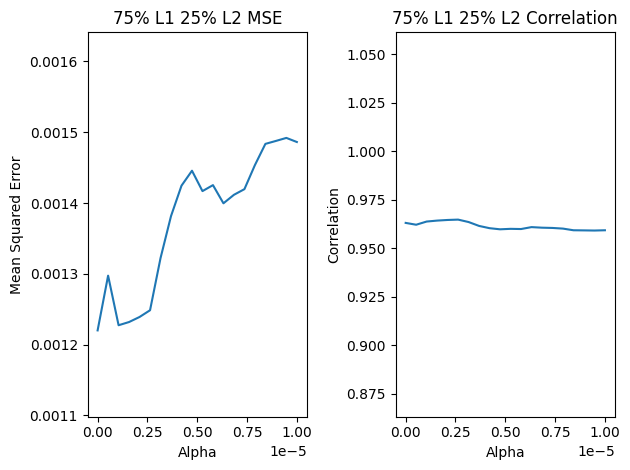

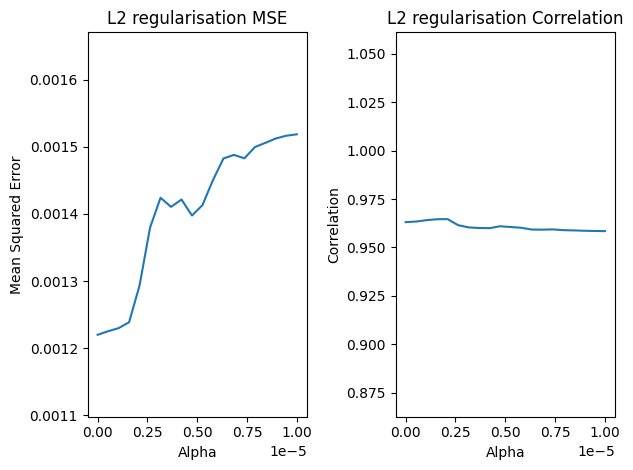

In [79]:
def plot_alpha_MSE(x_data,y_data, l1_wt, min_alpha, max_alpha, steps, title):
  alpha_correlations = []
  alpha_MSE = []
  # splits our range of alphas into steps
  for i in range(steps):
    # Get the average RMSE over 5 folds with the given alpha and l1_wt
    mean, _ = k_fold_cross_validation(5, x_data, y_data, True, min_alpha + i * (max_alpha - min_alpha) / steps, l1_wt, MSE=True)
    alpha_MSE.append(mean)
    # Get the average correlation over 5 folds with given alpha and l1_wt
    mean, _ = k_fold_cross_validation(5, x_data, y_data, True, min_alpha + i * (max_alpha - min_alpha) / steps, l1_wt, MSE=False)
    alpha_correlations.append(mean)

  # Create subplot
  fig, axs = plt.subplots(1, 2)

  xs = np.linspace(min_alpha,max_alpha,steps)

  # Plot the MSE vs Alpha
  axs[0].plot(xs, alpha_MSE)
  axs[0].set_ylabel("Mean Squared Error")
  axs[0].set_xlabel("Alpha")
  axs[0].set_title(title + " MSE")
  axs[0].set_ylim(min(alpha_MSE) * 0.9, max(alpha_MSE) * 1.1)

  # Plot the Correlation vs Alpha
  axs[1].plot(xs, alpha_correlations)
  axs[1].set_ylabel("Correlation")
  axs[1].set_xlabel("Alpha")
  axs[1].set_title(title + " Correlation")
  axs[1].set_ylim(min(alpha_correlations) * 0.9, max(alpha_correlations) * 1.1)

  # Show the graph
  plt.tight_layout()
  plt.show()

#def plot_l1_MSE(x_data, y_data, min_l1, max_l1, steps, alpha):
  # l1_correlations = []
#  l1_MSE = []
#  for i in range(steps):
#    preds = fit_regularised(x_data, y_data, alpha, l1_wt=min_l1 + i * (max_l1 - min_l1) / steps)
    # l1_correlations.append(np.corrcoef(y_data, preds)[0][1])
#    l1_MSE.append((np.mean((preds - y_data) ** 2)) ** 0.5)

#  plt.scatter(np.linspace(min_l1,max_l1,steps), l1_MSE)
#  plt.ylim(min(l1_MSE) * 0.9,max(l1_MSE) * 1.1)
#  plt.show()

def plot_fit(x_data, y_data, alpha, l1_wt):
  preds = list(fit_regularised(x_data, y_data, alpha, l1_wt=l1_wt))
  plt.scatter(x_data[: ,1], y_data)
  plt.scatter(x_data[: ,1], preds)
  plt.show()

subsection = len(features)
subset_features = features[:subsection]
subset_y = y[:subsection]

fynesse.address.plot_alpha_MSE(subset_features, subset_y, 0, 0,0.0001,20, "L1 regularisation")
fynesse.address.plot_alpha_MSE(subset_features, subset_y, 0.25, 0,0.00001,20, "25% L1 25% L2")
fynesse.address.plot_alpha_MSE(subset_features, subset_y, 0.5, 0,0.00001,20, "50% L1 50% L2")
fynesse.address.plot_alpha_MSE(subset_features, subset_y, 0.75, 0,0.00001,20, "75% L1 25% L2")
fynesse.address.plot_alpha_MSE(subset_features, subset_y, 1, 0,0.00001,20, "L2 regularisation")


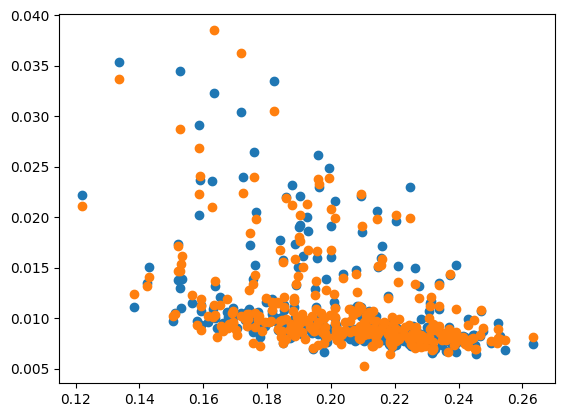

In [83]:

plot_fit(features, y, 0.00005, 0)

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


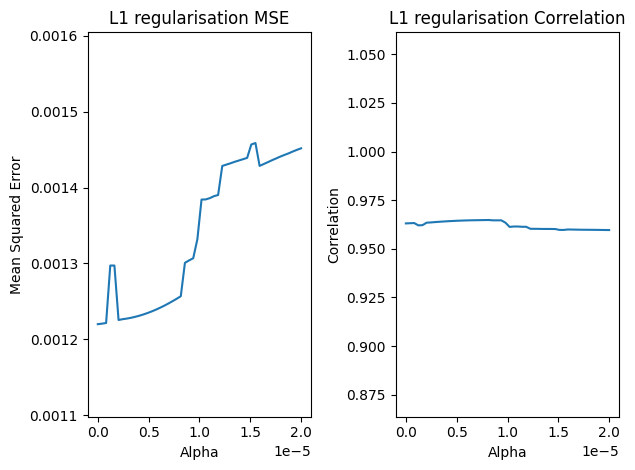

In [64]:
fynesse.address.plot_alpha_MSE(subset_features, subset_y, 0.25, 0,0.00002,50, "L1 regularisation")

## Prediction

### Exercise 8

Among the models created above, choose the one you believe performs *best*, and apply it to the entire dataset.

Fit a separate linear model for each of the age groups (0-99). Note down the model coefficients and plot them.

### Exercise 8

Write your answer to exercise 8 here

In [47]:
# print(features)
# feature_labels = ["constant"]
# l = len('National Statistics Socio-economic Classification (NS-SEC): ')
# for i in range(len(included_columns)):
#   feature_labels.append(included_columns[i][l:])
# print(feature_labels)
feature_labels = ["L1, L2 and L3", "L4, L5 and L6", "L7", "L8 and L9","L10 and L11", "L12", "L13", "L14.1 and L14.2", "L15"]

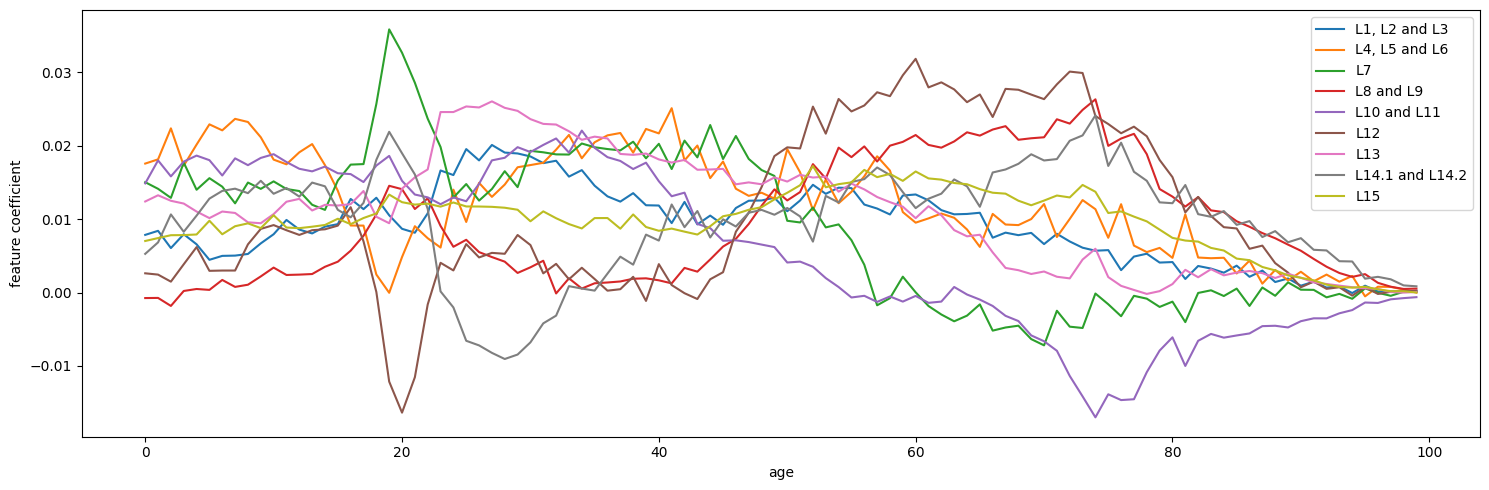

In [77]:
alpha = 0.00005
l1_wt = 0
parameters = []
x_axis = list(np.arange(0, 100))
for i in range(0, 100):
  y_data = norm_age_df[i].to_numpy()
  #model = sm.GLM(y_data, features, family=sm.families.Gaussian())
  model = sm.OLS(y_data, features)
  fitted_model = model.fit_regularized(alpha=alpha, L1_wt=l1_wt)
  parameters.append(list(fitted_model.params))

parameters = np.array(parameters)
fig, ax = plt.subplots(figsize=(15, 5))
for i in range(len(feature_labels)):
  ax.plot(x_axis, parameters[: ,i], label = feature_labels[i])
ax.legend(loc="upper right")
ax.set_xlabel("age")
ax.set_ylabel("feature coefficient")
plt.tight_layout()
plt.show()

### Exercise 9

Write a function that given a cities' NS-SEC breakdown, predicts it's age profile, and plot's it against the ground truth.

Play around with the method to find cities where your model works very well, but also ones where it works poorly.

### Exercise 9

Write your answer to exercise 9 here

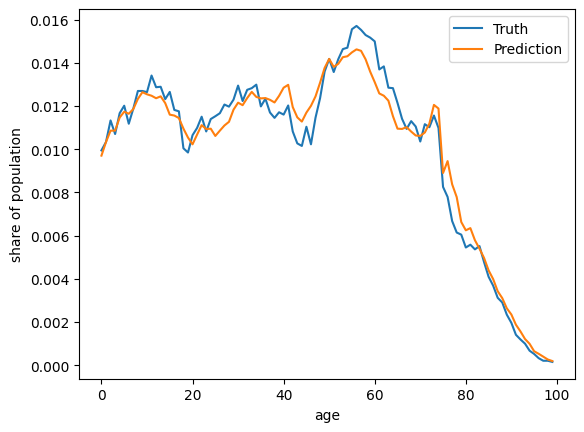

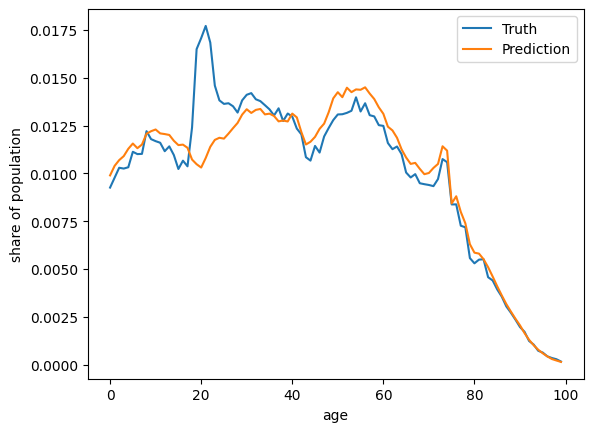

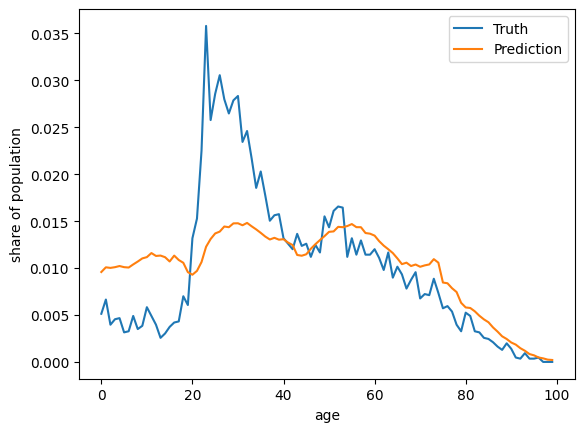

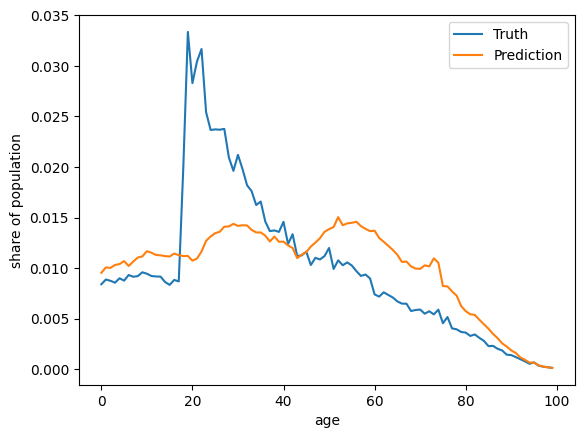

In [51]:
def predict_profile(NS_SEC, truth, norm_age_df, x_data, alpha, l1_wt):
  preds = []
  # Repeat for all ages
  for i in range(0, 100):
    # Get the y_data
    y_data = norm_age_df[i].to_numpy()

    # Create and fit a regulariazed model with alpha and l1_wt
    model = sm.GLM(y_data, x_data, family=sm.families.Gaussian())
    fitted_model = model.fit_regularized(alpha=alpha, L1_wt=l1_wt)

    # Get the prodictions given the NS_SEC data
    pred = fitted_model.predict(NS_SEC)
    preds.append(pred)

  # Plot the truth against the prediction
  plt.plot(np.arange(0, 100), list(truth), label = "Truth")
  plt.plot(np.arange(0, 100), preds, label = "Prediction")
  plt.xlabel("age")
  plt.ylabel("share of population")

  # Show the graph
  plt.legend()
  plt.show()


city = students_df.loc[students_df["geography"] == 'Hartlepool'].index
fynesse.address.predict_profile(norm_students_df.iloc[city].to_numpy()[0], norm_age_df.loc['Hartlepool'].to_numpy(), norm_age_df, features, alpha, l1_wt)

city = students_df.loc[students_df["geography"] == 'Plymouth'].index
fynesse.address.predict_profile(norm_students_df.iloc[city].to_numpy()[0], norm_age_df.loc['Plymouth'].to_numpy(), norm_age_df, features, alpha, l1_wt)

city =  students_df.loc[students_df["geography"] == 'City of London'].index
fynesse.address.predict_profile(norm_students_df.iloc[city].to_numpy()[0], norm_age_df.loc['City of London'].to_numpy(), norm_age_df, features, alpha, l1_wt)

city = students_df.loc[students_df["geography"] == "Cambridge"].index
fynesse.address.predict_profile(norm_students_df.iloc[city].to_numpy()[0], norm_age_df.loc['Cambridge'].to_numpy(), norm_age_df, features, alpha, l1_wt)

# Conclusions

This has been quite a short introduction to a set of very useful models. We have cut quite a few corners theoretically but importantly this is something that we have to do when working as data-scientist. We need to be able to apply models while there is still some uncertainty in how they work and be able to translate this uncertainty to how we interpret the results that we get. You are by no means expected to be experts on GLMs at all but you should be able to use them.

The next part of your challenge is now to include the models that we have built up and use them in the coursework. Try to first visualise the data, make a clear narrative of why you are selecting a specific model and try to use the tools that we derived her in order to provide context to the predictions that you make. The statsmodel package gives you a rich set of tools that you should be able to include directly into your project. Importantly, remember that the most important thing is to be able to say why a model does what it does not necessarily choosing the right model.

During the lecture Neil mentioned the idea that what separates statisticians from machine learners is that the former cares about β while the machine learners cares about $\hat{y}$ (the predictions). If you look at the statmodels package this concept becomes very clear. Using the GLM code as we did in the first exercise doesn’t actually provide us with the uncertainty in the predictions only in the parameters. It was because of this we changed from the GLM model class to OLS when using the basis functions.

## References

- McCullagh, P., & Nelder, J. A. (1989). *Generalized Linear Models*. London, UK: Chapman Hall / CRC.

- Rasmussen, Carl Edward, & Williams, Christopher K. I. (2006). *Gaussian Processes for Machine Learning* (Adaptive Computation and Machine Learning). The MIT Press.

- Silverman, B. W. (1985). "Some Aspects of the Spline Smoothing Approach To Non-Parametric Regression Curve Fitting". *Journal of the Royal Statistical Society: Series B (Methodological)*, 47(1), pp. 1–21.

- Vapnik, Vladimir N. (1999). *The Nature of Statistical Learning Theory*.
